#Importing Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt 
import tensorflow as tf
import sklearn

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential 

In [5]:
crypto_currency = 'BTC' 
against_currency = 'USD'

In [6]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [7]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)

#Preparing data for training

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train,y_train = [],[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days: x,0])
    y_train.append(scaled_data[x,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#creating the neural network

In [9]:
model = Sequential()


model.add(LSTM(units=50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train,y_train,epochs=25,batch_size=32)

2021-12-27 22:00:37.145844: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-27 22:00:37.147291: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 1450 samples
Epoch 1/25


2021-12-27 22:00:40.156868: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_6859_7344' and '__inference___backward_standard_lstm_6859_7344_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_8537' both implement 'lstm_d46d8dbf-1666-40c5-8110-6e3f1e29f26c' but their signatures do not match.


1450/1450 [==============================] - 20s 14ms/sample - loss: 0.0180
Epoch 2/25
1450/1450 [==============================] - 15s 10ms/sample - loss: 0.0034
Epoch 3/25
1450/1450 [==============================] - 14s 10ms/sample - loss: 0.0030
Epoch 4/25
1450/1450 [==============================] - 15s 10ms/sample - loss: 0.0032
Epoch 5/25
1450/1450 [==============================] - 15s 10ms/sample - loss: 0.0026
Epoch 6/25
1450/1450 [==============================] - 15s 10ms/sample - loss: 0.0032
Epoch 7/25
1450/1450 [==============================] - 15s 10ms/sample - loss: 0.0026
Epoch 8/25
1450/1450 [==============================] - 14s 10ms/sample - loss: 0.0027
Epoch 9/25
1450/1450 [==============================] - 14s 10ms/sample - loss: 0.0024
Epoch 10/25
1450/1450 [==============================] - 15s 10ms/sample - loss: 0.0025
Epoch 11/25
1450/1450 [==============================] - 16s 11ms/sample - loss: 0.0026
Epoch 12/25
1450/1450 [=============================

#Testing the model

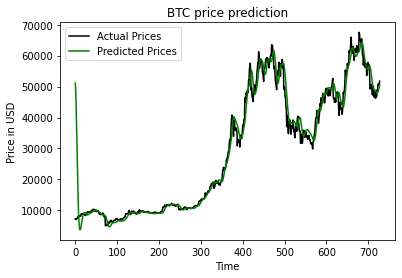

In [20]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start,test_end)
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'],test_data['Close']),axis = 0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)


x_test = []

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)


plt.plot(actual_prices,color='black',label = 'Actual Prices')
plt.plot(prediction_prices,color='green',label = 'Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel(f'Price in {against_currency}')
plt.legend(loc='upper left')
plt.show()